In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')
df3 = pd.read_csv('./data/210730_Index_ALL.txt', sep = ',')

frames = [df1, df2, df3]
df = pd.concat(frames, ignore_index = True)
print(df)

        <Ticker>  <DTYYYYMMDD>  <Open>  <High>   <Low>  <Close>  <Volume>
0            AAV      20210730    12.4   12.40   12.10    12.40    166400
1            ABT      20210730    26.0   27.20   26.00    27.10      1207
2            ACM      20210730     2.3    2.40    2.30     2.40    592463
3            ADC      20210730    21.5   21.50   21.50    21.50         0
4            ALT      20210730    12.7   12.70   12.70    12.70         0
...          ...           ...     ...     ...     ...      ...       ...
1452735  VNINDEX      20030609   152.0  152.49  152.35   152.35         0
1452736  VNINDEX      20030602   151.0  151.66  151.44   151.66         0
1452737  VNINDEX      20030530   152.0  152.47  152.24   152.24         0
1452738  VNINDEX      20030529   153.0  152.74  152.32   152.32         0
1452739  VNINDEX      20020314   189.0  188.97  188.97   188.97         0

[1452740 rows x 7 columns]


In [3]:
%%HTML
<h2>Extracting Data</h2>

In [4]:
df.columns=df.columns.str.replace('[<,>]','', regex=True)
print(df)

          Ticker  DTYYYYMMDD   Open    High     Low   Close  Volume
0            AAV    20210730   12.4   12.40   12.10   12.40  166400
1            ABT    20210730   26.0   27.20   26.00   27.10    1207
2            ACM    20210730    2.3    2.40    2.30    2.40  592463
3            ADC    20210730   21.5   21.50   21.50   21.50       0
4            ALT    20210730   12.7   12.70   12.70   12.70       0
...          ...         ...    ...     ...     ...     ...     ...
1452735  VNINDEX    20030609  152.0  152.49  152.35  152.35       0
1452736  VNINDEX    20030602  151.0  151.66  151.44  151.66       0
1452737  VNINDEX    20030530  152.0  152.47  152.24  152.24       0
1452738  VNINDEX    20030529  153.0  152.74  152.32  152.32       0
1452739  VNINDEX    20020314  189.0  188.97  188.97  188.97       0

[1452740 rows x 7 columns]


In [5]:
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')
print(df_modified)

          Ticker  DTYYYYMMDD   Open    High     Low   Close  Volume
0            AAV    20210730   12.4   12.40   12.10   12.40  166400
1            ABT    20210730   26.0   27.20   26.00   27.10    1207
2            ACM    20210730    2.3    2.40    2.30    2.40  592463
3            ADC    20210730   21.5   21.50   21.50   21.50       0
4            ALT    20210730   12.7   12.70   12.70   12.70       0
...          ...         ...    ...     ...     ...     ...     ...
1452735  VNINDEX    20030609  152.0  152.49  152.35  152.35       0
1452736  VNINDEX    20030602  151.0  151.66  151.44  151.66       0
1452737  VNINDEX    20030530  152.0  152.47  152.24  152.24       0
1452738  VNINDEX    20030529  153.0  152.74  152.32  152.32       0
1452739  VNINDEX    20020314  189.0  188.97  188.97  188.97       0

[1452727 rows x 7 columns]


In [6]:
data = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
print(data)

Ticker        AAA   AAM   AAT   AAV    ABS   ABT    ACB    ACC    ACL  ACM  \
DTYYYYMMDD                                                                   
20020314      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030529      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030530      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030602      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030609      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
...           ...   ...   ...   ...    ...   ...    ...    ...    ...  ...   
20210726    15.45  10.8  17.5  12.4  18.55  27.6  32.70  14.00  11.40  2.3   
20210727    16.00  10.5  17.7  12.4  18.90  27.6  33.15  13.70  11.60  2.3   
20210728    16.30  10.1  17.6  12.4  19.35  27.0  33.15  13.70  11.60  2.3   
20210729    16.15  10.8  17.6  12.4  19.95  27.0  34.15  13.70  11.50  2.3   
20210730    16.15  10.9  17.6  12.4  20.40  27.1  36.15  13.75  

In [7]:
%%HTML
<h3>Filtering Data</h3>

In [8]:
data = data.loc[20180102:20181228]
print(data)


Ticker         AAA    AAM  AAT    AAV  ABS     ABT     ACB     ACC     ACL  \
DTYYYYMMDD                                                                   
20180102    21.245  6.506  NaN    NaN  NaN  23.750  14.502  11.121   3.425   
20180103    21.310  6.286  NaN    NaN  NaN  23.673  14.465  11.287   3.304   
20180104    21.213  6.286  NaN    NaN  NaN  24.133  14.502  11.342   3.405   
20180105    21.083  6.569  NaN    NaN  NaN  23.980  14.502  11.342   3.385   
20180108    21.698  6.537  NaN    NaN  NaN  23.520  14.988  11.287   3.162   
...            ...    ...  ...    ...  ...     ...     ...     ...     ...   
20181224    13.040  9.014  NaN  7.893  NaN  36.541  13.710  13.221  13.201   
20181225    12.776  9.117  NaN  7.893  NaN  34.629  13.615  13.221  12.365   
20181226    12.776  9.186  NaN  7.893  NaN  33.609  13.568  13.221  12.429   
20181227    13.128  9.048  NaN  7.972  NaN  35.946  13.899  13.221  12.858   
20181228    12.952  9.186  NaN  7.972  NaN  34.161  13.993  13.2

In [9]:
data.isnull().values.any()

True

<AxesSubplot:>

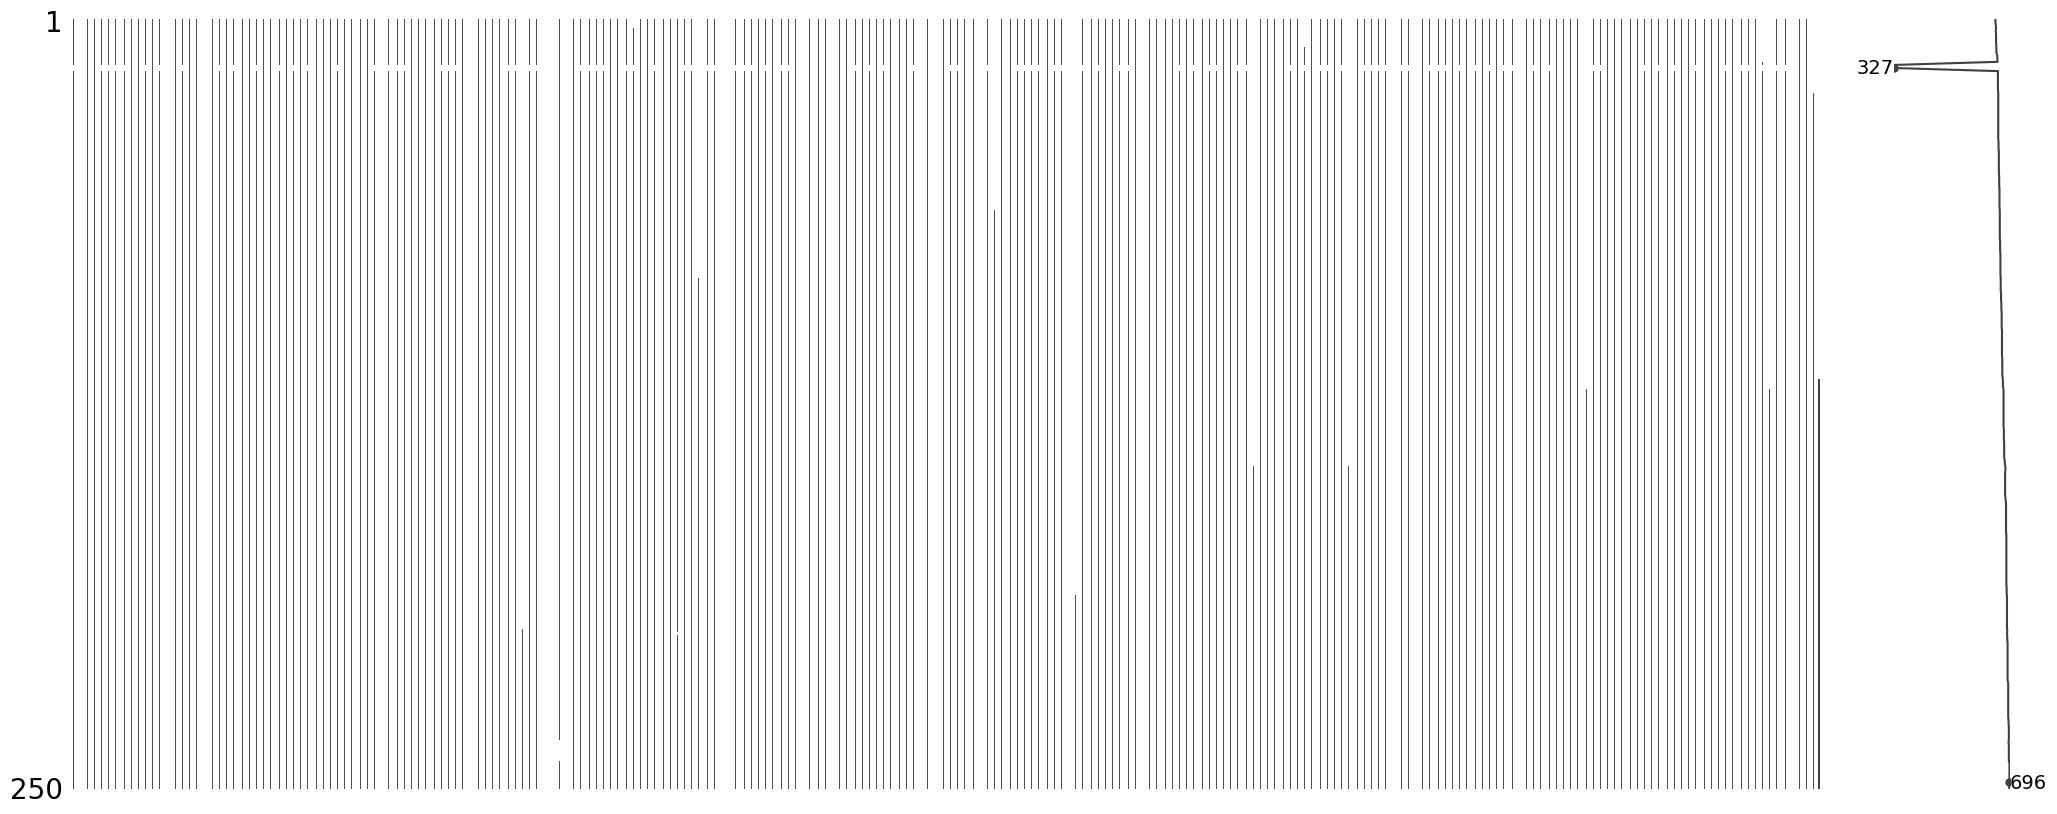

In [10]:
import missingno
missingno.matrix(data)

In [11]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (250, 755)
Data Shape after cleaning = (250, 662)


In [12]:
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')

In [13]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change().mean()*250
returns = pd.DataFrame(returns)
returns.columns = ['returns']

#Calculate the volatility
returns['volatility'] = data.pct_change().std()*np.sqrt(250)

data = returns
print(data)

         returns  volatility
Ticker                      
AAA    -0.417090    0.399833
AAM     0.425459    0.398103
ABT     0.479690    0.479610
ACB     0.046815    0.406576
ACC     0.221178    0.308463
...          ...         ...
VTV    -0.120525    0.543470
VXB     0.406013    0.558623
WCS    -0.049318    0.491594
WSS    -0.203095    0.414352
X20    -0.483772    0.618183

[662 rows x 2 columns]


In [14]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=["returns", "volatility"], how="all", inplace=True)
print(data)

         returns  volatility
Ticker                      
AAA    -0.417090    0.399833
AAM     0.425459    0.398103
ABT     0.479690    0.479610
ACB     0.046815    0.406576
ACC     0.221178    0.308463
...          ...         ...
VTV    -0.120525    0.543470
VXB     0.406013    0.558623
WCS    -0.049318    0.491594
WSS    -0.203095    0.414352
X20    -0.483772    0.618183

[661 rows x 2 columns]


In [15]:
from sklearn.preprocessing import StandardScaler

#Prepare the scaler
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data
X.head()

,returns,volatility
Ticker,,
AAA,-1.129424,-0.342032
AAM,0.955385,-0.352895
ABT,1.089574,0.159013
ACB,0.018465,-0.299679
ACC,0.449912,-0.915880


In [16]:
%%HTML
<h3>K-Means Clustering</h3>

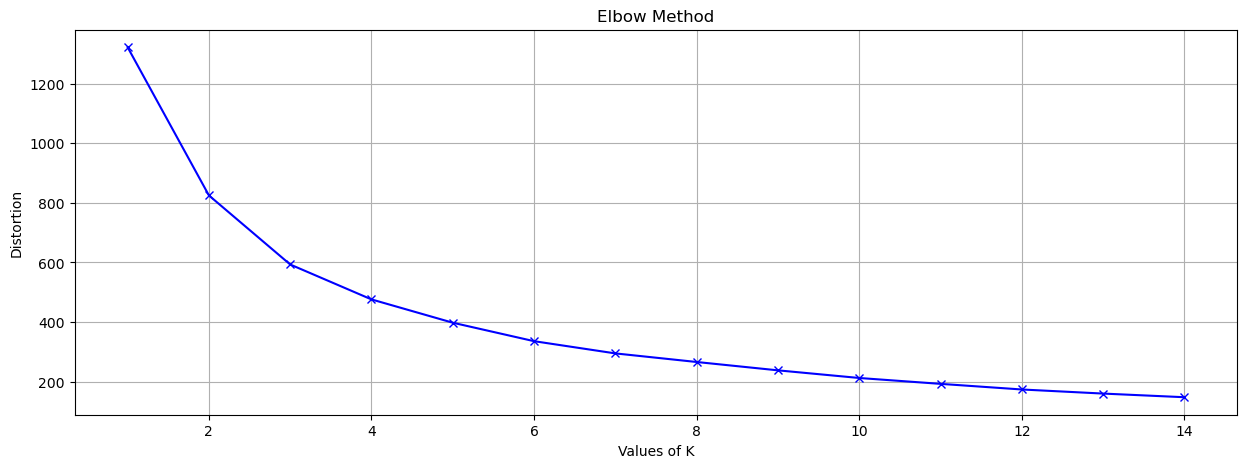

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [18]:
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

4

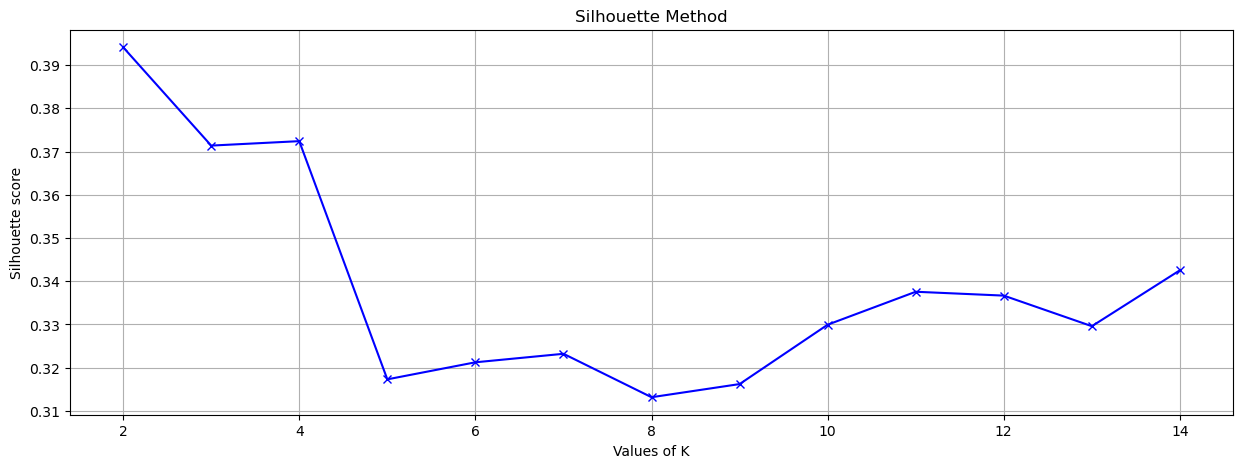

Suggested number of clusters:  3


In [19]:
from sklearn.metrics import silhouette_score

#For the silhouette method k needs to start from 2
K = range(2,15)
silhouettes = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
print('Suggested number of clusters: ', kl.elbow)

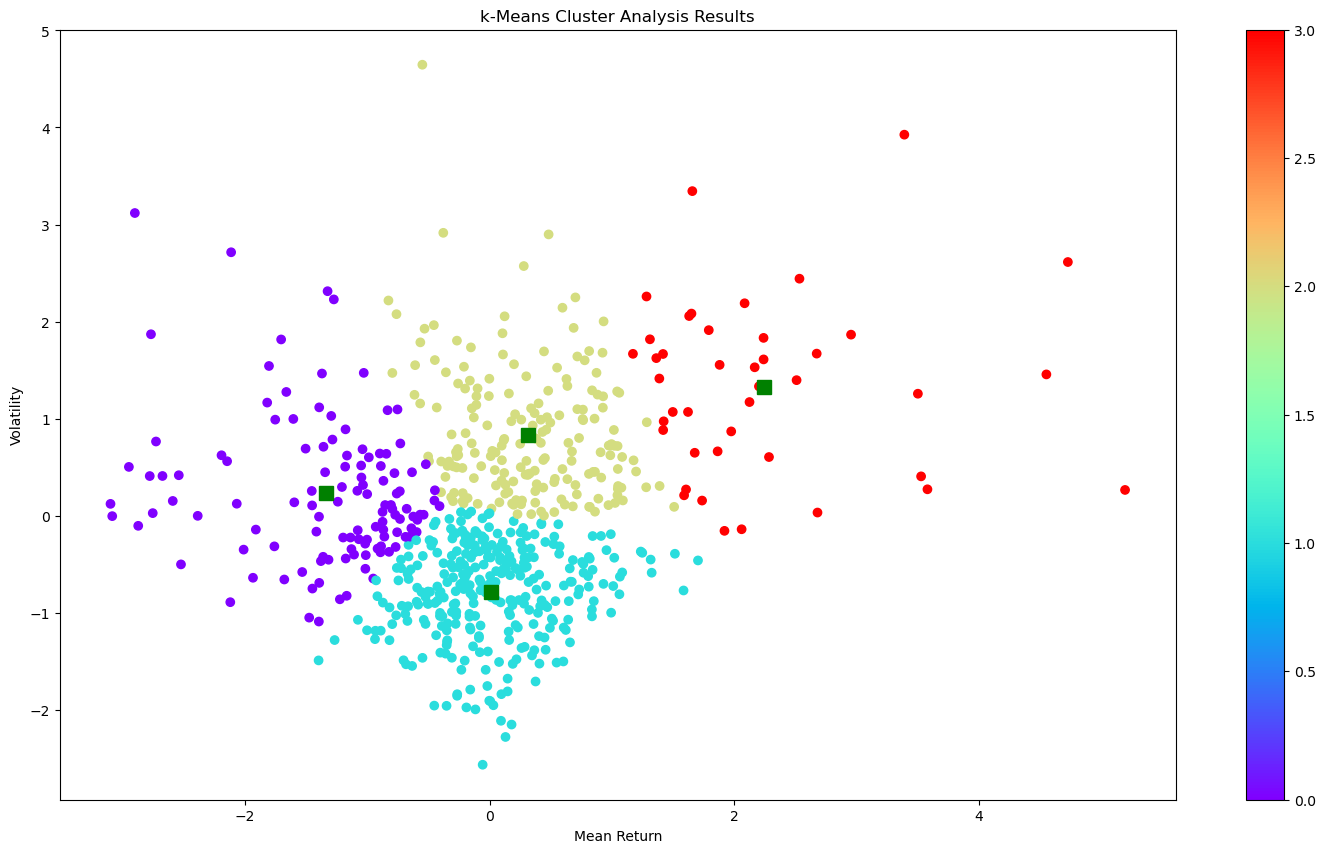

In [20]:
c = 4
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Cluster Analysis Results')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.colorbar(scatter)
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
plt.show()

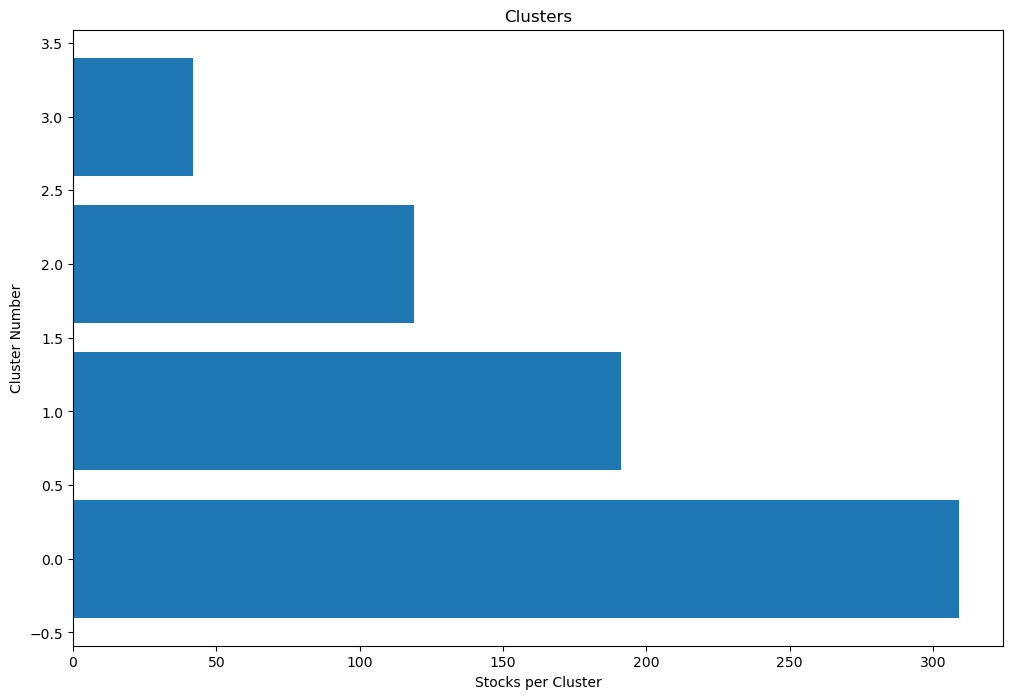

In [21]:
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
plt.figure(figsize=(12,8))
plt.barh(range(len(clustered_series.value_counts())),clustered_series.value_counts())
plt.title('Clusters')
plt.xlabel('Stocks per Cluster')
plt.ylabel('Cluster Number')
plt.show()